In [9]:
import timeit
import pandas as pd
import seaborn as sns
import graspologic
from graspologic.simulations import er_np
from graspologic.plot import heatmap
from graspologic.utils import utils as gus
from graspologic.inference import latent_distribution_test
import networkx as nx

import matplotlib.pyplot as plt
import numpy as np

## Sim 1 - time vs n_verts for a single iteration of LDT
1. n_verts = [10, 100, 500, 1000]
2. Generate two ER graphs - 1st with n_vert vertices and second with 2*n_vert vertices, and p=0.5 for both
3. Obtain times for running LDT unparallelized (workers=1) and parallelized (workers=-1) on the two graphs
4. Repeat steps 2-3 for 10 trials per n_vert in n_verts
5. Plot stripplots of times vs n_verts (of graph 1) for LDT unparallelized and parallelized

In [10]:
n_verts = [10, 100, 500]
total_verts = []
time_orig = []
time_par = []
p_vals_diff = []

In [11]:
for n in n_verts:
    for _ in range(10):
        
        total_verts.append(n)
        A1 = er_np(n, 0.5)
        A2 = er_np(2*n, 0.5)
           
        #get time for original ldt
        start_time = timeit.default_timer()
        ldt_orig = latent_distribution_test(A1, A2, workers=1)
        elapsed_orig = timeit.default_timer() - start_time
        time_orig.append(elapsed_orig)
        p_val_orig = ldt_orig[0]
        
        #get time for parallelized ldt
        start_time = timeit.default_timer()
        ldt_par = latent_distribution_test(A1, A2, workers=-1)
        elapsed_par = timeit.default_timer() - start_time
        time_par.append(elapsed_par)
        p_val_new = ldt_orig[1]
        
        p_vals_diff.append(abs(p_val_orig - p_val_new))
        print(n)
        

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy-1.5.2-py3.8-macosx-10.9-x86_64.egg/scipy/stats/_multivariate.py:664: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


10


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy-1.5.2-py3.8-macosx-10.9-x86_64.egg/scipy/stats/_multivariate.py:664: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy-1.5.2-py3.8-macosx-10.9-x86_64.egg/scipy/stats/_multivariate.py:664: RuntimeWarning: c

10


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy-1.5.2-py3.8-macosx-10.9-x86_64.egg/scipy/stats/_multivariate.py:664: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


10


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy-1.5.2-py3.8-macosx-10.9-x86_64.egg/scipy/stats/_multivariate.py:664: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


10


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy-1.5.2-py3.8-macosx-10.9-x86_64.egg/scipy/stats/_multivariate.py:664: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


10


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy-1.5.2-py3.8-macosx-10.9-x86_64.egg/scipy/stats/_multivariate.py:664: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


10


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy-1.5.2-py3.8-macosx-10.9-x86_64.egg/scipy/stats/_multivariate.py:664: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


10


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy-1.5.2-py3.8-macosx-10.9-x86_64.egg/scipy/stats/_multivariate.py:664: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


10


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy-1.5.2-py3.8-macosx-10.9-x86_64.egg/scipy/stats/_multivariate.py:664: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


10


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


10


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


100


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


100


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


100


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


100


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


100


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


100


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy-1.5.2-py3.8-macosx-10.9-x86_64.egg/scipy/stats/_multivariate.py:664: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


100


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


100


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


100


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


100


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


500


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


500


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


500


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


500


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


500


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


500


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


500


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


500


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


500


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


500


In [12]:
time_orig_dict = {"time_orig": time_orig, "n_verts": total_verts}
df_orig = pd.DataFrame(data = time_orig_dict)

In [13]:
time_par_dict = {"time_par": time_par, "n_verts": total_verts}
df_par = pd.DataFrame(data = time_par_dict)

In [14]:
p_vals_dict = {"p_vals_diff": p_vals_diff, "n_verts": total_verts}
df_pval = pd.DataFrame(data = p_vals_dict)

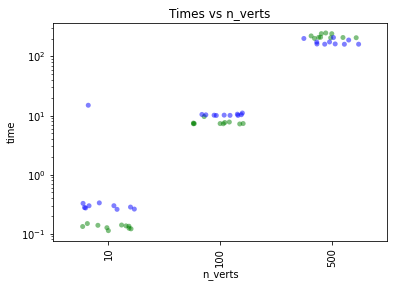

In [17]:
ax1 = sns.stripplot(data=df_orig,
    x="n_verts",
    y="time_orig",
    jitter = 0.25,
    alpha = 0.5,
    size=5,
    color='green'
)

ax2 = sns.stripplot(data=df_par,
    x="n_verts",
    y="time_par",
    jitter = 0.25,
    alpha = 0.5,
    size=5,
    color='blue'
)
ax1.set_yscale('log')
plt.xticks(rotation='vertical')
plt.ylabel('time')
plt.title("Times vs n_verts")

plt.savefig('time_vs_n_verts.png')

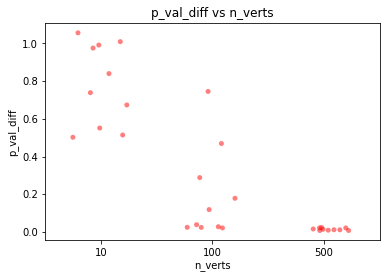

In [18]:
ax = sns.stripplot(data=df_pval,
    x="n_verts",
    y="p_vals_diff",
    jitter = 0.25,
    alpha = 0.5,
    size=5,
    color='red'
)

plt.ylabel('p_val_diff')
plt.title('p_val_diff vs n_verts')
plt.savefig('p_val_diff_vs_n_verts.png')

## Sim 2 - single vs multiple iterations of LDT (?)
1. n_iters = [1, 5, 25, 50]
2. Generate two ER graphs - 1st with 100 vertices and second with 200 vertices, and p=0.5 for both
3. Obtain times for running LDT unparallelized (workers=1) and parallelized (workers=-1) on the two graphs for n_iters iterations
4. Repeat steps 2-3 for 15 trials per n_iter in n_iters
4. Plot stripplots of times vs n_iters for LDT unparallelized and parallelized

In [ ]:
n_iters = [1, 5, 25, 50]
total_iters = []
time_orig = []
time_par = []

In [ ]:
B1 = er_np(50, 0.5)
B2 = er_np(75, 0.5)

for n in n_iters:
    for _ in range(15):
    
        total_iters.append(n)

        #get time for original ldt
        ind_orig = 0
        start_time = timeit.default_timer()
        while (ind_orig<n):
            ldt_orig = latent_distribution_test(B1, B2, workers=1)
            ind_orig += 1
        elapsed_orig = timeit.default_timer() - start_time
        time_orig.append(elapsed_orig)

        #get time for parallelized ldt
        ind_par = 0
        start_time = timeit.default_timer()
        while(ind_par<n):
            ldt_par = latent_distribution_test(B1, B2, workers=-1)
            ind_par += 1
        elapsed_par = timeit.default_timer() - start_time
        time_par.append(elapsed_par)
        
        print(n)

In [ ]:
time_orig_dict = {"time_orig": time_orig, "n_iters": total_iters}
df_orig = pd.DataFrame(data = time_orig_dict)

In [ ]:
time_par_dict = {"time_par": time_par, "n_iters": total_iters}
df_par = pd.DataFrame(data = time_par_dict)

In [ ]:
ax1 = sns.stripplot(data=df_orig,
    x="n_iters",
    y="time_orig",
    jitter = 0.5,
    alpha = 0.5,
    size=5,
    color='green'
)

ax2 = sns.stripplot(data=df_par,
    x="n_iters",
    y="time_par",
    jitter = 0.5,
    alpha = 0.5,
    size=5,
    color='blue'
)
ax1.set_yscale('log')
plt.xticks(rotation='vertical')
plt.ylabel('time')
plt.title("Times vs n_iters")

plt.savefig('time_vs_n_iters.png')